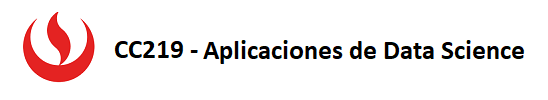

<h3 align="center"><b>TRABAJO PARCIAL</b></h3>
<h3 align="center">2024-1</h3>


---


**Integrantes:**


*   Andy Johan Muñico Soto - u201523017
*   Lennin Jhair Vargas Soto - u20201e766
*   Jorge Omar Tarapa Peña - u202021508
*   Angel Ruben Zuñiga Lovera - u202111299





---

"**Analisis Exploratorio de Datos**"

In [ ]:
import nltk
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Cargar el dataset
df = pd.read_csv('data.csv')

In [ ]:
df

,Y,text
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails why congress is falling ...
2,0,eat your veggies 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word stream...
...,...,...
20028,1,tollbooth attendant wishes just one high speed...
20029,0,emotional intelligence needs moral rudder
20030,1,man putting off starting family to focus on tr...
20031,0,the 8 most important lessons from my first yea...


In [ ]:
# Mostrar las primeras filas y obtener información
print(df.head())
print(df.info())

   Y                                               text
0  1  thirtysomething scientists unveil doomsday clo...
1  0  dem rep totally nails why congress is falling ...
2  0   eat your veggies 9 deliciously different recipes
3  1  inclement weather prevents liar from getting t...
4  1  mother comes pretty close to using word stream...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20033 entries, 0 to 20032
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Y       20033 non-null  int64 
 1   text    20033 non-null  object
dtypes: int64(1), object(1)
memory usage: 313.1+ KB
None


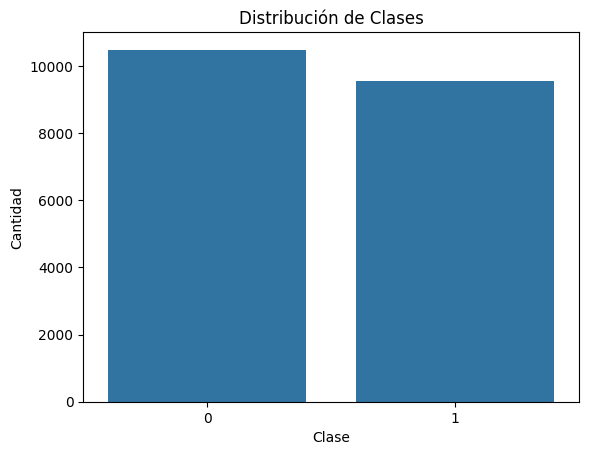

In [ ]:
# Gráfico de conteo de clases
sns.countplot(x='Y', data=df)
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.title('Distribución de Clases')
plt.show()

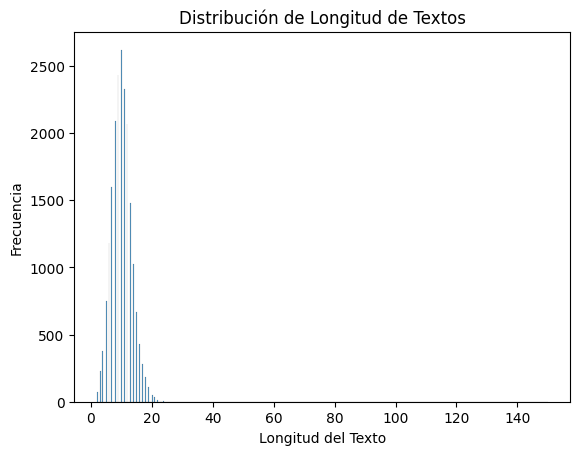

In [ ]:
# Agregar una columna con la longitud de los textos
df['longitud_texto'] = df['text'].apply(lambda x: len(x.split()))

# Histograma de longitud de textos
sns.histplot(df['longitud_texto'])
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitud de Textos')
plt.show()

In [ ]:
# Tokenización de los textos
nltk.download('punkt')
df['tokens'] = df['text'].apply(lambda x: word_tokenize(x.lower()))

# Conteo de palabras
word_counts = Counter()
df['tokens'].apply(word_counts.update)

# Palabras más comunes
common_words = word_counts.most_common(10)
print(common_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('to', 6446), ('of', 4386), ('the', 3824), ('in', 3209), ('for', 2567), ('on', 1843), ('and', 1412), ('with', 1373), ('trump', 1227), ('is', 1192)]


"**Preprocesamiento**"

In [ ]:
# Función para eliminar signos de puntuación
def remove_punctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])

# Aplicar la función a los tokens
df['tokens'] = df['tokens'].apply(lambda x: [remove_punctuation(token) for token in x])


In [ ]:
nltk.download('stopwords')

# Obtener lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Función para eliminar stopwords
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# Aplicar la función a los tokens
df['tokens'] = df['tokens'].apply(remove_stopwords)

print(df[['tokens']].head())

                                              tokens
0  [thirtysomething, scientists, unveil, doomsday...
1  [dem, rep, totally, nails, congress, falling, ...
2  [eat, veggies, 9, deliciously, different, reci...
3  [inclement, weather, prevents, liar, getting, ...
4  [mother, comes, pretty, close, using, word, st...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('wordnet')

# Inicializar lematizador
lemmatizer = WordNetLemmatizer()

# Función para lematizar tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Aplicar la función a los tokens
df['tokens'] = df['tokens'].apply(lemmatize_tokens)

print(df[['tokens']].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              tokens
0  [thirtysomething, scientist, unveil, doomsday,...
1  [dem, rep, totally, nail, congress, falling, s...
2   [eat, veggie, 9, deliciously, different, recipe]
3  [inclement, weather, prevents, liar, getting, ...
4  [mother, come, pretty, close, using, word, str...


In [ ]:
# Ejemplo de convertir tokens a minúsculas
def to_lowercase(tokens):
    return [token.lower() for token in tokens]

# Aplicar conversión a minúsculas a cada lista de tokens
df['tokens'] = df['tokens'].apply(to_lowercase)

print(df[['tokens']].head())

                                              tokens
0  [thirtysomething, scientist, unveil, doomsday,...
1  [dem, rep, totally, nail, congress, falling, s...
2   [eat, veggie, 9, deliciously, different, recipe]
3  [inclement, weather, prevents, liar, getting, ...
4  [mother, come, pretty, close, using, word, str...


In [ ]:
# Crear un nuevo DataFrame con las columnas 'Y' y 'tokens'
new_df = df[['Y', 'tokens']].copy()

# Guardar el nuevo DataFrame en un archivo CSV
new_df.to_csv('new_data.csv', index=False)

print(new_df)

       Y                                             tokens
0      1  [thirtysomething, scientist, unveil, doomsday,...
1      0  [dem, rep, totally, nail, congress, falling, s...
2      0   [eat, veggie, 9, deliciously, different, recipe]
3      1  [inclement, weather, prevents, liar, getting, ...
4      1  [mother, come, pretty, close, using, word, str...
...   ..                                                ...
20028  1  [tollbooth, attendant, wish, one, high, speed,...
20029  0     [emotional, intelligence, need, moral, rudder]
20030  1  [man, putting, starting, family, focus, treadi...
20031  0       [8, important, lesson, first, year, college]
20032  1  [priscilla, chan, leaf, mark, zuckerberg, onio...

[20033 rows x 2 columns]
